<a href="https://colab.research.google.com/github/MabelOlivia/Machine-Learning/blob/master/Exploratory%20Data%20Analysis/EDA_and_Logistic_Regression_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Logistic Regression with Python
For this lecture we will be working with the Titanic Data Set. This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set


## Understanding the Columns

Column Description:

*  Survived : This shows whether the individual survived or not.(0 = No; 1 = Yes)
*  Pclass : This shows the socio-economic class of the passenger where the first class shows a fairly stable economic individual while the third class shows a less stable economic individual. (1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class)
*  Name : This shows the name of the individual.
*  Sex : This shows the gender of the individual.
*  Age : This column shows the estimate of the ages of the individual.
*  Sibsp : This column shows the number of siblings/ spouses on board.
*  Parch : This columns shows the number of parents/children on board.
*  Ticket Number : This shows the ticket number of the passenger on board.
*  Fare : This column shows the amount of transport money the individual paid.
*  Cabin : This shows the cabin or area one was in during the voyage.
*  Embarked : This column shows the port where the individual embarked on; C representing Cherbough, Q representing Queenstown, S representing Southampton.

## Import Libraries
Let's import some libraries to get started!

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## Loading the Dataset

In [9]:
from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [10]:
import io
df = pd.read_csv(io.BytesIO(uploaded['titanic_train.csv']))
# Dataset is now stored in a Pandas Dataframe

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

### Missing Values

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

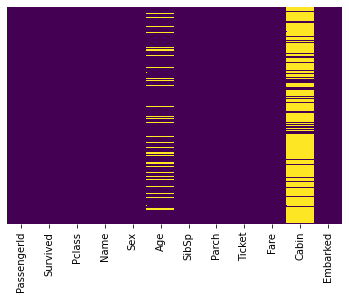

In [18]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of computation. Looking at the Cabin column,there is a lot of missing values. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

## Visualizing data

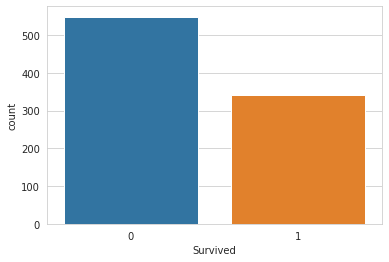

In [20]:
sns.set_style("whitegrid")
sns.countplot(x= "Survived", data=df)

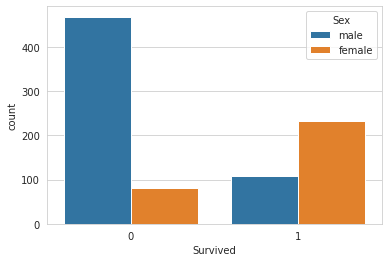

In [21]:
sns.set_style("whitegrid")
sns.countplot(x= "Survived", hue="Sex", data=df)

From the plot above we can conclude that most people who survived were female

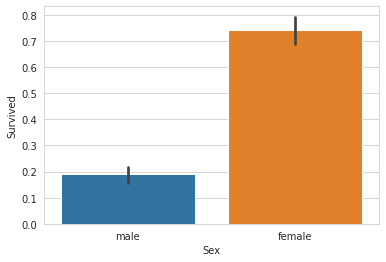

In [22]:
sns.barplot(x = df['Sex'], y = df['Survived'], data=df)

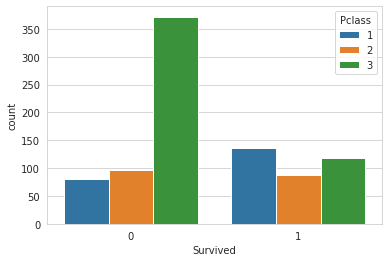

In [23]:
sns.set_style("whitegrid")
sns.countplot(x= "Survived", hue="Pclass", data=df)

In [27]:
df1 = df.groupby(["Survived", "Pclass"])
df1.describe()

PassengerId              ...        Fare          
                      count        mean  ...         75%       max
Survived Pclass                          ...                      
0        1             80.0  410.300000  ...   78.937500  263.0000
         2             97.0  452.123711  ...   26.000000   73.5000
         3            372.0  453.580645  ...   15.136450   69.5500
1        1            136.0  491.772059  ...  111.481225  512.3292
         2             87.0  439.080460  ...   26.250000   65.0000
         3            119.0  394.058824  ...   15.875000   56.4958

[6 rows x 40 columns]

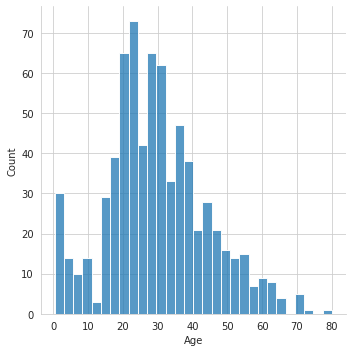

In [35]:
sns.displot(df.Age.dropna(), bins = 30)

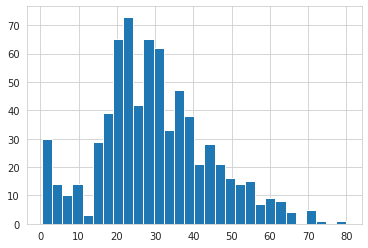

In [34]:
df.Age.hist(bins=30)

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

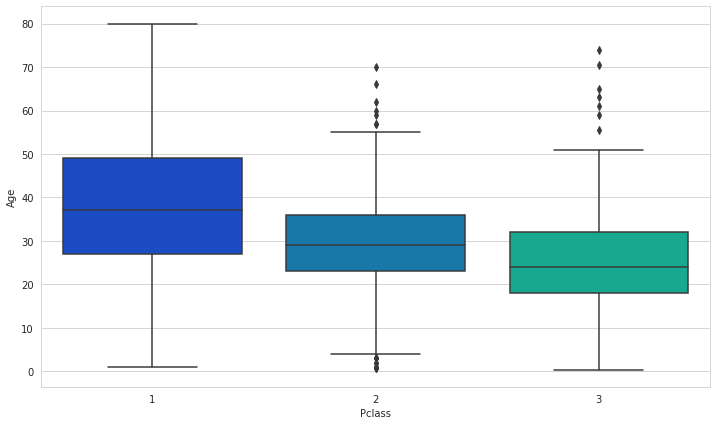

In [36]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [75]:
age1=df[df['Pclass']==1]['Age'].median()
age2=df[df['Pclass']==2]['Age'].median()
age3=df[df['Pclass']==3]['Age'].median()
print(age1)
print(age2)
age3

37.0
29.0


24.0

In [43]:

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [44]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

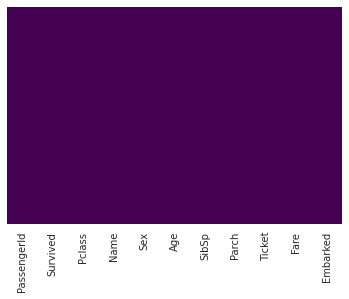

In [47]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [46]:
df.drop('Cabin',axis=1,inplace=True)

In [48]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [49]:
df = df.dropna()


## Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [52]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)


In [ ]:
df=df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [55]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [57]:
df = pd.concat([df,sex,embark], axis = 1)

In [58]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Our dataset is ready

## Building a Model

In [59]:
X = df.drop("Survived", axis=1)

In [60]:
y = df.Survived

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state = 101)

In [63]:
from sklearn.linear_model import LogisticRegression

In [66]:
model = LogisticRegression(max_iter=10000)

In [67]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
model.score(X_test,y_test)

0.8258426966292135

In [69]:
predictions = model.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
accuracy = confusion_matrix(y_test, predictions)
accuracy

array([[99,  8],
       [23, 48]])

In [73]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0])